<a href="https://colab.research.google.com/github/yuvipaloozie/Semiconductor-Yield-Optimization-and-RCA/blob/main/SECOMGoldenBatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)


In [ ]:
df = pd.read_csv("uci-secom.csv")

print(df.shape)

display(df.head())

target_col = df.columns[-1]

print(target_col)

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.

Pass/Fail


Ratio of passes to fails:  14.067307692307692


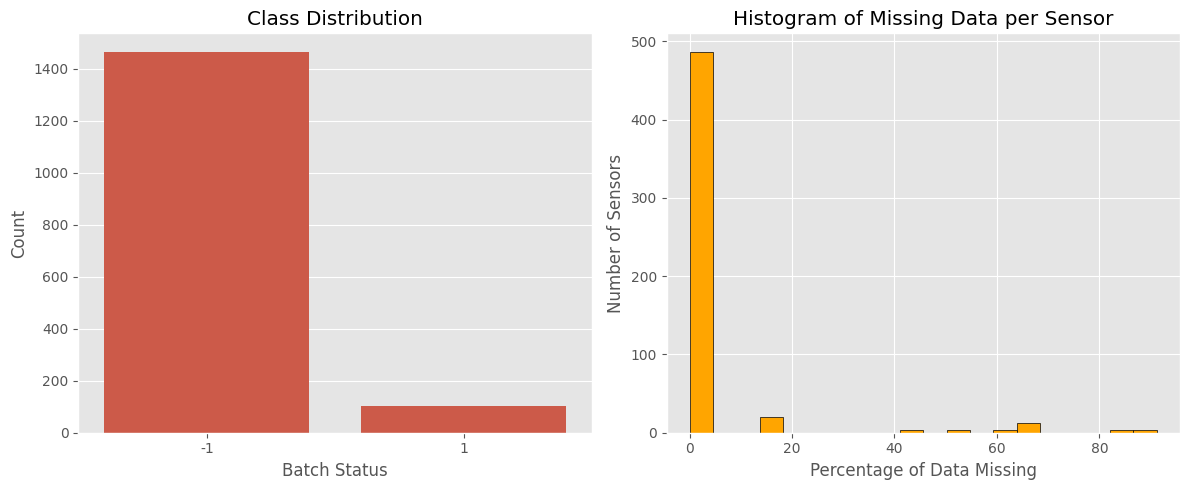

- Total Columns with missing data: 538
- Sensors with >50% data missing (candidates for deletion): 28


In [ ]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.countplot(x=df[target_col])
plt.title("Class Distribution")
plt.xlabel("Batch Status")
plt.ylabel("Count")

pass_count = df[target_col].value_counts().max()
fail_count = df[target_col].value_counts().min()
ratio = pass_count / fail_count
print("Ratio of passes to fails: ", ratio)


plt.subplot(1, 2, 2)
# Calculate % missing for each sensor
missing = df.isnull().sum() / len(df) * 100
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.hist(missing, bins=20, color='orange', edgecolor='black')
plt.title("Histogram of Missing Data per Sensor")
plt.xlabel("Percentage of Data Missing")
plt.ylabel("Number of Sensors")

plt.tight_layout()
plt.show()

high_missing = missing[missing > 50].count()
print(f"- Total Columns with missing data: {len(missing)}")
print(f"- Sensors with >50% data missing (candidates for deletion): {high_missing}")

In [ ]:
df = df.drop(columns=['Time'])

target_col = 'Pass/Fail'
df[target_col] = df[target_col].map({-1: 0, 1: 1})

threshold = 0.5 * len(df)
df_cleaned = df.dropna(axis=1, thresh=threshold).copy()

# If a sensor reads "500" for every single batch, it predicts nothing.
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
var_check = df_cleaned[numeric_cols].var()
low_variance_cols = var_check[var_check == 0].index

df_cleaned = df_cleaned.drop(columns=low_variance_cols)

print(f"Original Column Count: {df.shape[1]}")
print(f"Columns Dropped (>50% Missing): {len(df.columns) - len(df.dropna(axis=1, thresh=threshold).columns)}")
print(f"Columns Dropped (Zero Variance): {len(low_variance_cols)}")
print(f"Remaining Columns: {df_cleaned.shape[1]}")

Original Column Count: 591
Columns Dropped (>50% Missing): 28
Columns Dropped (Zero Variance): 116
Remaining Columns: 447


In [ ]:
# 1. Separate Features and Target FIRST to protect the target column
# We check if target_col exists just to be safe, though it should be there from Cell 4
if target_col in df_cleaned.columns:
    X_temp = df_cleaned.drop(columns=[target_col])
    y = df_cleaned[target_col]
else:
    # Fallback if it was already separated (rare, but handles re-running cells)
    X_temp = df_cleaned
    # Assuming y is already defined globally or we need to alert the user
    print("Warning: Target column not found in df_cleaned. Ensure Cell 4 ran correctly.")

# 2. Calculate Correlation Matrix on Features ONLY
print("Calculating correlation matrix on features...")
corr_matrix = X_temp.corr().abs()

# Select upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# 3. Print the dropped columns
print(f"\nDuplicate/Redundant Sensors Detected: {len(to_drop)}")
print(f"List of dropped sensors: {to_drop}")

# 4. Drop them from the feature set
X = X_temp.drop(columns=to_drop)

print("-" * 30)
print(f"Final Feature Count (X): {X.shape[1]}")

Calculating correlation matrix on features...

Duplicate/Redundant Sensors Detected: 174
List of dropped sensors: ['27', '36', '96', '104', '105', '106', '127', '140', '148', '152', '165', '174', '206', '209', '249', '252', '271', '272', '274', '275', '277', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '332', '333', '334', '335', '338', '339', '340', '341', '342', '343', '344', '347', '349', '350', '351', '352', '353', '354', '355', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '410', '411', '415', '416', '417', '420', '421', '424', '425', '426', '427', '428', '429', '435', '436', '437', '440', '441', '442', '443', '444', '445', '446', '447', '448', '452',

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

# 1. Stratified Split
# 'stratify=y' ensures the Train and Test sets have the same ratio of Failures.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train set shape: {X_train.shape}")
print(f"Test set shape:  {X_test.shape}")

imputer = KNNImputer(n_neighbors=5)

print("\nStarting KNN Imputation (This may take 30-60 seconds)...")

# FIT on Train, TRANSFORM Train and Test
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

print("Imputation Complete.")

Train set shape: (1253, 272)
Test set shape:  (314, 272)

Starting KNN Imputation (This may take 30-60 seconds)...
Imputation Complete. No missing values remain.


Pass Count (0): 1170
Fail Count (1): 83
Calculated scale_pos_weight: 14.10
------------------------------
Training XGBoost Model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:18:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Complete.

--- Model Performance Report ---


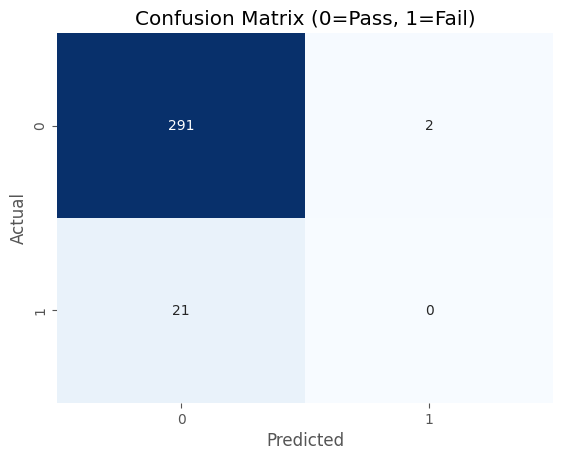

              precision    recall  f1-score   support

        Pass       0.93      0.99      0.96       293
        Fail       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314

ROC-AUC Score: 0.497


In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score

# 1. Calculate the Scale Pos Weight
# Formula: count(Negative) / count(Positive)
# In our case: count(Pass) / count(Fail)
num_pass = (y_train == 0).sum()
num_fail = (y_train == 1).sum()
scale_weight = num_pass / num_fail

print(f"Pass Count (0): {num_pass}")
print(f"Fail Count (1): {num_fail}")
print(f"Calculated scale_pos_weight: {scale_weight:.2f}")
print("-" * 30)

# 2. Initialize and Fit XGBoost
# We use a relatively simple tree (depth=4) to prevent overfitting on this small dataset
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_weight,  # <--- The key to handling imbalance
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

print("Training XGBoost Model...")
model.fit(X_train_imputed, y_train)
print("Training Complete.")

# 3. Quick Evaluation
y_pred = model.predict(X_test_imputed)

print("\n--- Model Performance Report ---")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (0=Pass, 1=Fail)')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Pass', 'Fail']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.3f}")

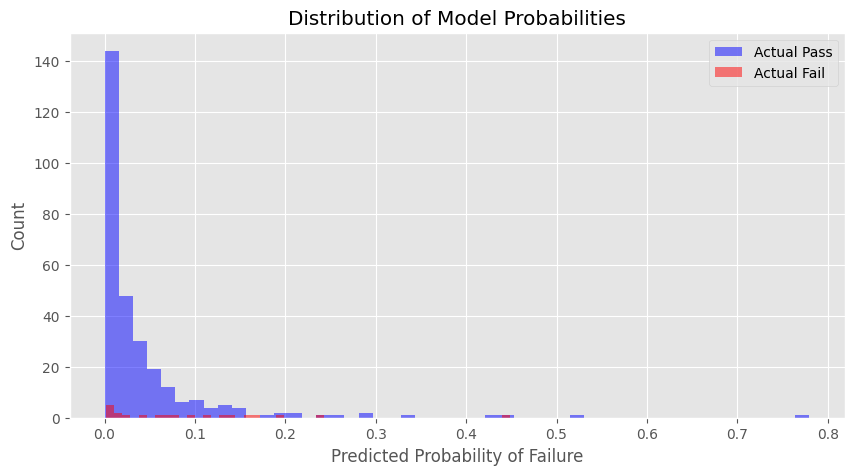

Best Threshold found: 0.1342
Best F1-Score at this threshold: 0.298

--- Optimized Model Performance ---


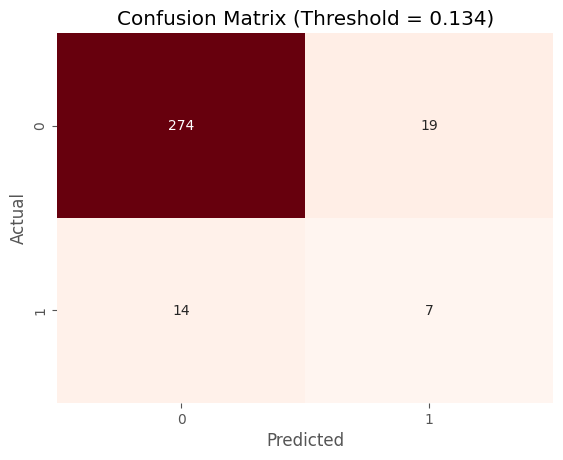

              precision    recall  f1-score   support

        Pass       0.95      0.94      0.94       293
        Fail       0.27      0.33      0.30        21

    accuracy                           0.89       314
   macro avg       0.61      0.63      0.62       314
weighted avg       0.91      0.89      0.90       314

ROC-AUC Score: 0.634


In [ ]:
from sklearn.metrics import precision_recall_curve

# 1. Get the Raw Probabilities (instead of just 0/1 predictions)
# [:, 1] gives us the probability of Class 1 (Fail)
y_scores = model.predict_proba(X_test_imputed)[:, 1]

# 2. Visualize the Histogram of Probabilities
plt.figure(figsize=(10, 5))
plt.hist(y_scores[y_test==0], bins=50, alpha=0.5, label='Actual Pass', color='blue')
plt.hist(y_scores[y_test==1], bins=50, alpha=0.5, label='Actual Fail', color='red')
plt.xlabel('Predicted Probability of Failure')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Model Probabilities')
plt.show()

# 3. Find the Optimal Threshold (Precision-Recall Curve)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# We want to balance Precision and Recall. F1-Score is a good metric for this.
# Note: thresholds is 1 element shorter than precision/recall arrays
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold found: {best_threshold:.4f}")
print(f"Best F1-Score at this threshold: {f1_scores[best_idx]:.3f}")

# 4. Apply the New Threshold
y_pred_new = (y_scores >= best_threshold).astype(int)

# 5. Re-evaluate
print("\n--- Optimized Model Performance ---")
cm = confusion_matrix(y_test, y_pred_new)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title(f'Confusion Matrix (Threshold = {best_threshold:.3f})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_pred_new, target_names=['Pass', 'Fail']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_new):.3f}")

Calculating SHAP values (this may take 1-2 minutes)...


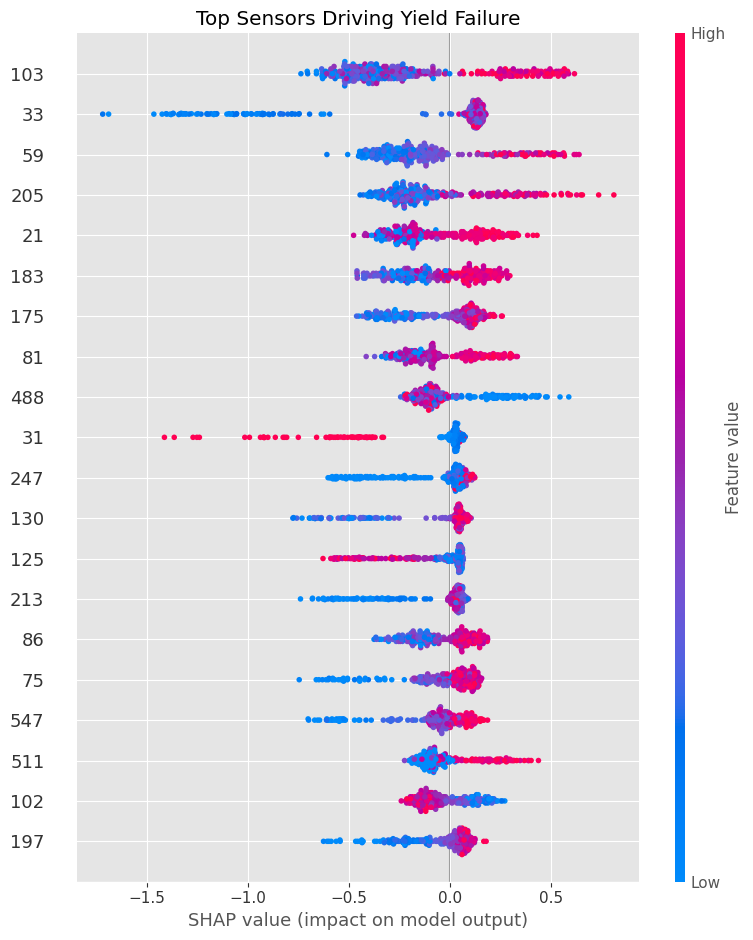

The Top 3 Critical Sensors are: ['103', '33', '59', '205', '21']


In [ ]:
!pip install shap -q

import shap

# 2. Create the Explainer
# We use TreeExplainer because XGBoost is a tree-based model
print("Calculating SHAP values (this may take 1-2 minutes)...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_imputed)

plt.figure(figsize=(10, 8))
plt.title("Top Sensors Driving Yield Failure")
shap.summary_plot(shap_values, X_test_imputed, show=False)
plt.show()

# 4. Extract Top 3 Features for the next phase
# We sum the absolute SHAP values to find the biggest movers
vals = np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_test_imputed.columns, vals)),
                                  columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
top_features = feature_importance['col_name'].head(5).tolist()

print(f"The Top 3 Critical Sensors are: {top_features}")

Analyzing Safe Windows for: ['103', '33', '59']


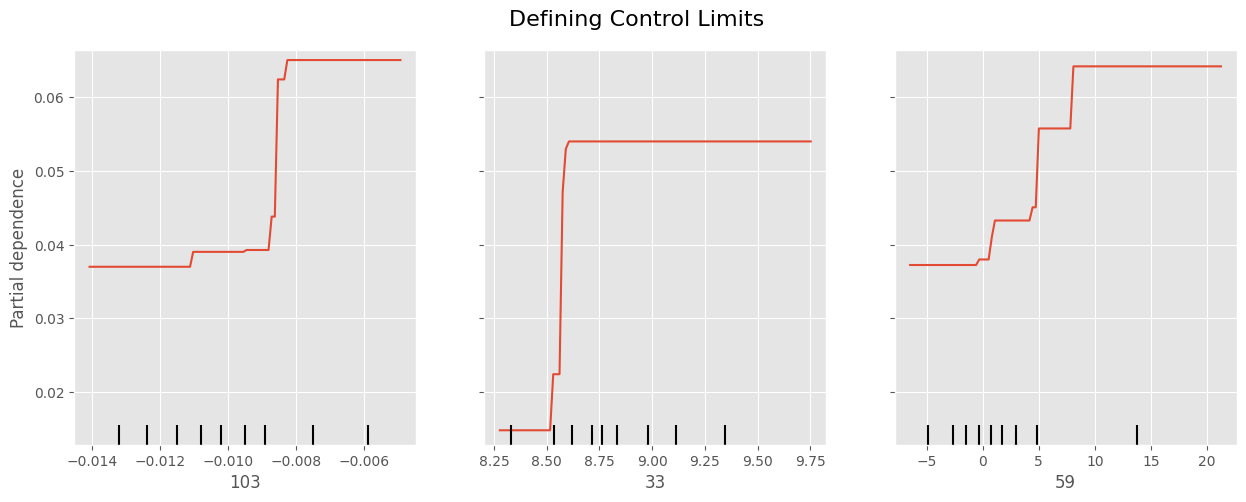

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# 1. Define the Top 3 features manually based on your SHAP plot
# (We use the column names from your plot)
top_features = ['103', '33', '59']

# Ensure these match your actual column names (likely 'Sensor_103' etc.)
# Let's auto-detect the right names just in case they have prefixes
cols = X_test_imputed.columns
mapped_features = []
for f in top_features:
    # Find column that ends with the number (e.g. '103' or 'Sensor_103')
    match = [c for c in cols if c.endswith(f'_{f}') or c == f]
    if match:
        mapped_features.append(match[0])
    else:
        # Fallback if names are simple integers disguised as strings
        mapped_features.append(f)

print(f"Analyzing Safe Windows for: {mapped_features}")

# 2. Plot Partial Dependence
# This shows: As Sensor X increases, how does Failure Probability change?
fig, ax = plt.subplots(figsize=(15, 5))
display = PartialDependenceDisplay.from_estimator(
    model,
    X_test_imputed,
    mapped_features,
    kind="average",
    ax=ax
)

plt.suptitle("Defining Control Limits", fontsize=16)
plt.subplots_adjust(top=0.9) # Make room for title
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Define the Parameter Grid
# These are the "knobs" we will twist
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],        # Fraction of rows to use per tree
    'colsample_bytree': [0.6, 0.8, 1.0], # Fraction of columns to use per tree
    'gamma': [0, 0.1, 0.2],              # Minimum loss reduction to make a split
    'scale_pos_weight': [scale_weight, scale_weight * 1.5, scale_weight * 2] # Tuning the imbalance weight
}

# 2. Setup the Search
# We use 'f1' as the scoring metric because Accuracy is useless here
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,             # Try 50 random combinations
    scoring='f1',          # Optimize for F1 Score
    cv=3,                  # 3-Fold Cross Validation
    verbose=1,
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

print("Starting Hyperparameter Search (this may take 2-3 minutes)...")
search.fit(X_train_imputed, y_train)

# 3. Report Results
print("\n--- Tuning Complete ---")
print(f"Best Parameters: {search.best_params_}")
print(f"Best CV F1 Score: {search.best_score_:.3f}")

# 4. Save the Best Model
best_model = search.best_estimator_

Starting Hyperparameter Search (this may take 2-3 minutes)...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:37:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Tuning Complete ---
Best Parameters: {'subsample': 0.6, 'scale_pos_weight': np.float64(21.14457831325301), 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best CV F1 Score: 0.235


New Optimal Threshold: 0.4490

--- Tuned Model Performance ---


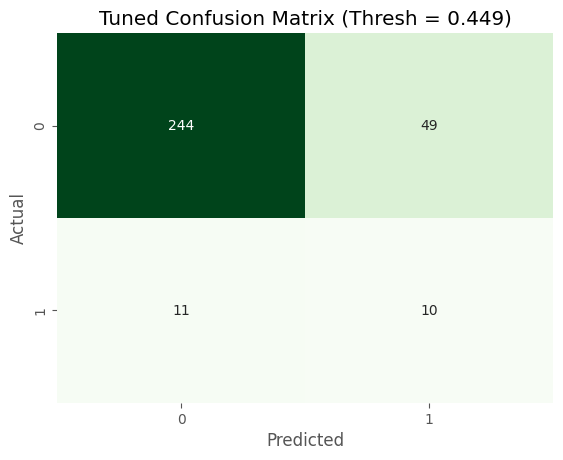

              precision    recall  f1-score   support

        Pass       0.96      0.83      0.89       293
        Fail       0.17      0.48      0.25        21

    accuracy                           0.81       314
   macro avg       0.56      0.65      0.57       314
weighted avg       0.90      0.81      0.85       314

ROC-AUC Score: 0.733


In [ ]:
# 1. Get Probabilities from the Tuned Model
y_scores_tuned = best_model.predict_proba(X_test_imputed)[:, 1]

# 2. Find Best Threshold (Maximize F1)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_tuned)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold_tuned = thresholds[best_idx]

print(f"New Optimal Threshold: {best_threshold_tuned:.4f}")

# 3. Apply Threshold
y_pred_tuned = (y_scores_tuned >= best_threshold_tuned).astype(int)

# 4. Compare Performance
print("\n--- Tuned Model Performance ---")
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False) # Changed color to distinguish
plt.title(f'Tuned Confusion Matrix (Thresh = {best_threshold_tuned:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_tuned, target_names=['Pass', 'Fail']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_scores_tuned):.3f}")

Threshold for Max F1 Score:       0.4490
Threshold for Min Business Cost:  0.3466
------------------------------
Lowest Possible Cost Strategy:   $95,000.00


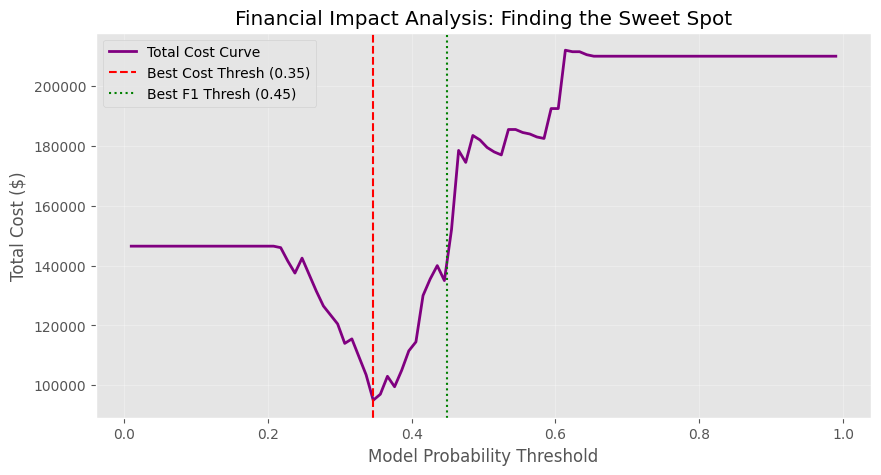

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Define Real-World Costs
# Scenario: Semiconductor Wafer Manufacturing
COST_FP = 500     # Cost of False Alarm (Inspection labor, tool downtime)
COST_FN = 10000   # Cost of Missed Scrap (Wasted materials, customer return)

# 2. Test 100 potential thresholds
thresholds_candidate = np.linspace(0.01, 0.99, 100)
costs = []

for t in thresholds_candidate:
    # Apply threshold
    preds = (y_scores_tuned >= t).astype(int)

    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

    # Calculate Total Financial Impact
    total_cost = (fp * COST_FP) + (fn * COST_FN)
    costs.append(total_cost)

# 3. Find the Minimum Cost
min_cost_idx = np.argmin(costs)
best_business_threshold = thresholds_candidate[min_cost_idx]
min_cost = costs[min_cost_idx]

# 4. Compare F1 Threshold vs. Business Threshold
print(f"Threshold for Max F1 Score:       {best_threshold_tuned:.4f}")
print(f"Threshold for Min Business Cost:  {best_business_threshold:.4f}")
print("-" * 30)
print(f"Lowest Possible Cost Strategy:   ${min_cost:,.2f}")

# 5. Visualize the "Cost Curve"
plt.figure(figsize=(10, 5))
plt.plot(thresholds_candidate, costs, color='purple', linewidth=2, label='Total Cost Curve')
plt.axvline(best_business_threshold, color='red', linestyle='--', label=f'Best Cost Thresh ({best_business_threshold:.2f})')
plt.axvline(best_threshold_tuned, color='green', linestyle=':', label=f'Best F1 Thresh ({best_threshold_tuned:.2f})')
plt.xlabel('Model Probability Threshold')
plt.ylabel('Total Cost ($)')
plt.title('Financial Impact Analysis: Finding the Sweet Spot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Calculating SHAP values for the Tuned Model...


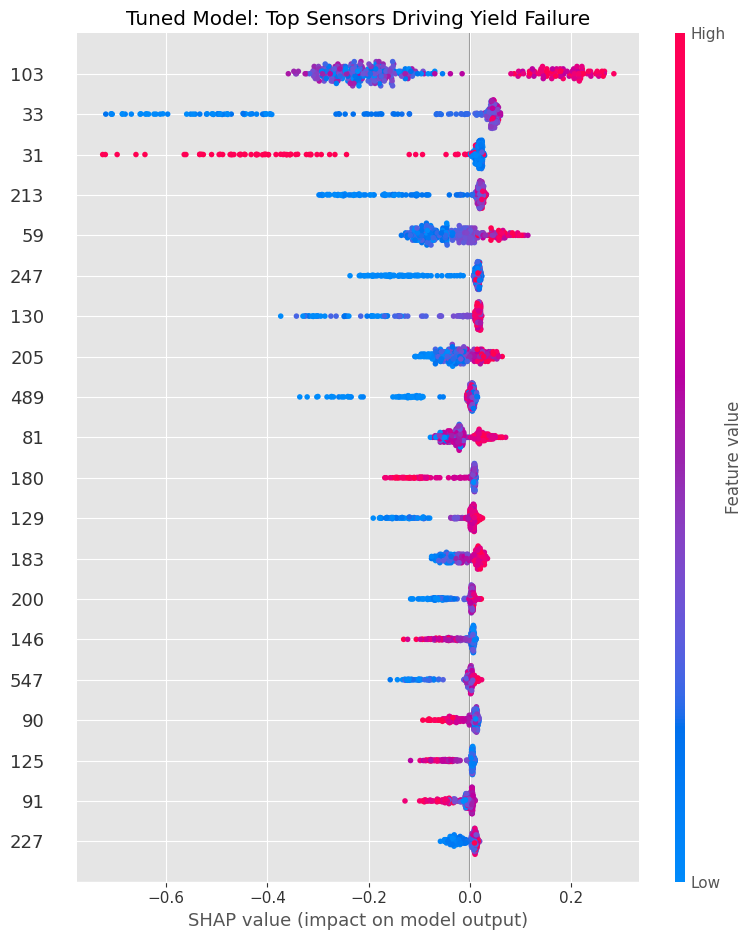

The New Top 3 Critical Sensors are: ['103', '33', '31', '213', '59']


In [ ]:
explainer_tuned = shap.TreeExplainer(best_model)
shap_values_tuned = explainer_tuned.shap_values(X_test_imputed)

plt.figure(figsize=(10, 8))
plt.title("Tuned Model: Most Important Sensors")
shap.summary_plot(shap_values_tuned, X_test_imputed, show=False)
plt.show()

vals = np.abs(shap_values_tuned).mean(0)
feature_importance = pd.DataFrame(list(zip(X_test_imputed.columns, vals)),
                                  columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
top_features_tuned = feature_importance['col_name'].head(5).tolist()

print(f"Top 5 critical sensors (using tuned model): {top_features_tuned}")

Analyzing Safe Windows for: ['103', '33', '31', '213', '59']


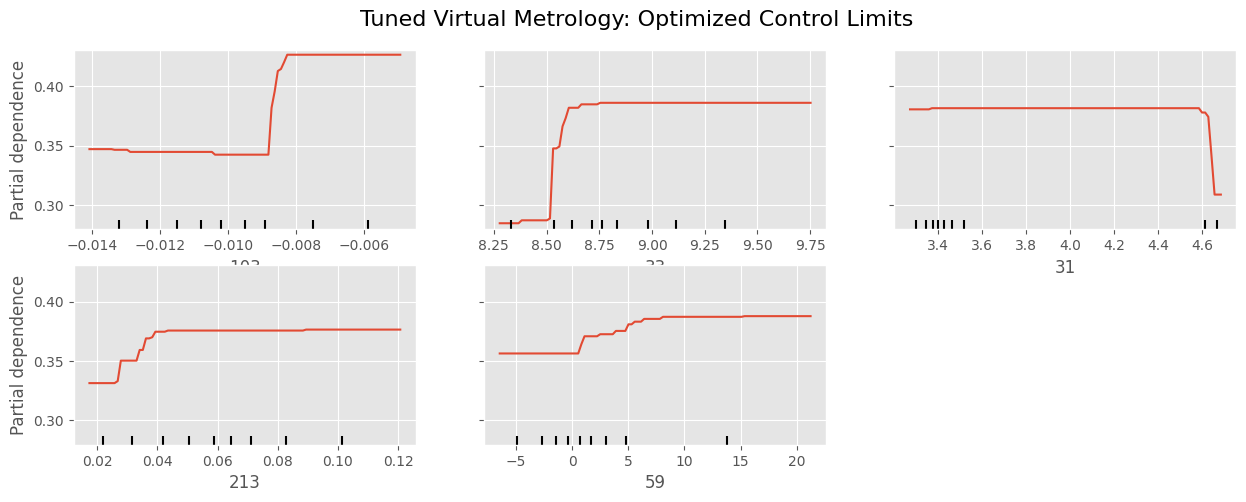

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

print(f"Selected sensors: {top_features_tuned}")

# plot partial dependence again
fig, ax = plt.subplots(figsize=(15, 5))
display = PartialDependenceDisplay.from_estimator(
    best_model,
    X_test_imputed,
    top_features_tuned,
    kind="average",
    ax=ax
)

plt.suptitle("Control Limits For Important Sensors", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()